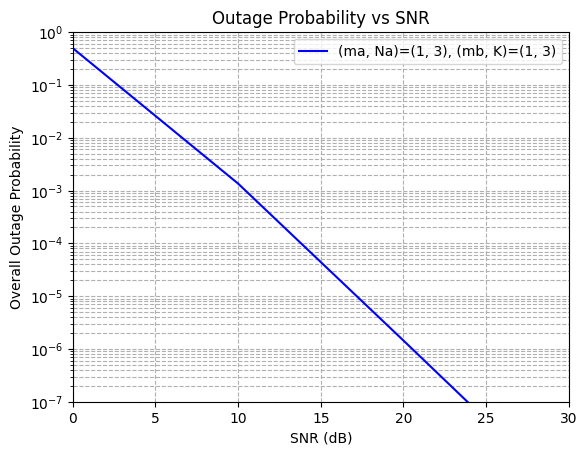

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, binom, kv
import math

# Parameters for the single curve
ma, Na = 1, 3  # Specific values for ma and Na
mb, K = 1, 3   # Specific values for mb and K

Ptdb_values = np.arange(0, 31, 10)  # Range of SNR values in dB

def calculate_outage_probability(Ptdb, ma, Na, mb, K):
    Pt = 10 ** (Ptdb / 10)
    Pa = Pb = Pr = Pt / 3
    R1 = 0.5
    R2 = 1
    gammath2 = 2 ** (2 * R2) - 1
    psith2 = gammath2 * (Pa + Pr) / Pr
    d = 0.5
    omegaa = d ** (-4)
    omegab = (1 - d) ** (-4)
    gamma2a = (Pa + Pr) * omegaa
    gamma2b = Pb * omegab

    def b(r, p):
        if r == 0:
            return 1
        elif r == 1:
            return p * (mb / gamma2b)
        else:
            sum_val = 0
            for i in range(1, min(r, mb - 1) + 1):
                term = (i * p - r + i) * (1 / math.factorial(i)) * ((mb / gamma2b) ** i) * b(r - i, p)
                sum_val += term  # Accumulate the sum
            return (1 / r) * sum_val

    sum_p = 0
    for p in range(0, K):
        sum_r = 0
        for r in range(0, p * (mb - 1) + 1):
            inner_sum_m = 0
            G = (mb * (1 + p) * psith2 / gamma2b) + (ma * psith2 / gamma2a)
            for m in range(0, ma * Na):
                inner_sum_j = 0
                for j in range(0, mb + r):
                    inner_sum_i = 0
                    for i in range(0, m + 1):
                        bessel_k_value = kv(j - i + 1, 2 * np.sqrt((ma * mb * ((psith2)** 2)*(p + 1)) / (gamma2a * gamma2b)))
                        inner_sum_i += binom(m, i) * (psith2 ** i) * 2 * ((((gamma2b * ma * (psith2 ** 2)) / (gamma2a * mb * (p + 1)))) ** ((j - i + 1) / 2)) * bessel_k_value
                    inner_sum_j += binom(mb + r - 1, j) * (psith2 ** (mb + r - 1 - j)) * inner_sum_i
                inner_sum_m += (1 / math.factorial(m)) * ((ma * psith2 / gamma2a) ** m ) * np.exp(-G) * inner_sum_j
            term1 = gamma(mb + r) - ((mb * (p + 1) / gamma2b) ** (mb + r)) * inner_sum_m
            sum_r += b(r, p) * ((gamma2b / (mb * (p + 1))) ** (mb + r)) * term1
        sum_p += binom(K - 1, p) * ((-1) ** p) * sum_r

    Pout = (K / gamma(mb)) * ((mb / gamma2b) ** mb) * sum_p
    return Pout

Pout_values = [calculate_outage_probability(Ptdb, ma, Na, mb, K) for Ptdb in Ptdb_values]

plt.plot(Ptdb_values, Pout_values, label=f'(ma, Na)=({ma}, {Na}), (mb, K)=({mb}, {K})', color='blue')

plt.yscale('log')

plt.xlabel('SNR (dB)')
plt.ylabel('Overall Outage Probability')
plt.title('Outage Probability vs SNR')

plt.grid(True, which="both", ls="--")
plt.legend()
plt.ylim(1e-7, 1)
plt.xlim(0, 30)
plt.show()


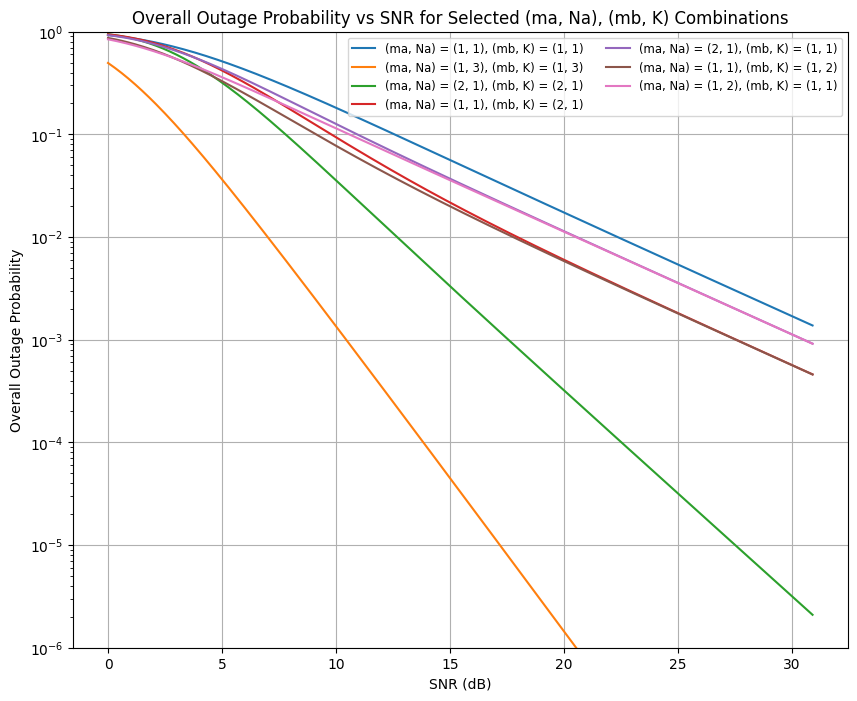

In [2]:
import numpy as np
import pandas as pd
from scipy.special import gamma
import matplotlib.pyplot as plt



# Set up the range for Ptdb, Na, K, ma, mb
ptdb_range = np.arange(0, 31, 0.1)
Na_range = np.arange(1, 4)
K_range = np.arange(1, 4)
ma_range = np.arange(1, 4)
mb_range = np.arange(1, 4)

# Iterate over all combinations of Ptdb, Na, K, ma, and mb
results = []

for Ptdb in ptdb_range:
    for Na in Na_range:
        for K in K_range:
            for ma in ma_range:
                for mb in mb_range:
                    # Calculate Pout
                    Pout = calculate_outage_probability(Ptdb, ma, Na, mb, K)

                    # Store the results in a list
                    results.append((Ptdb, Na, K, ma, mb, Pout))

# Convert the results into a DataFrame
df = pd.DataFrame(results, columns=['Ptdb', 'Na', 'K', 'ma', 'mb', 'Pout'])

plot_combinations = [
    (1, 1, 1, 1),
    (1, 3, 1, 3),
    (2, 1, 2, 1),
    (1, 1, 2, 1),
    (2, 1, 1, 1),
    (1, 1, 1, 2),
    (1, 2, 1, 1)
]

# Plotting
plt.figure(figsize=(10, 8))

# Plot for the specified combinations
for ma, Na, mb, K in plot_combinations:
    subset = df[(df['Na'] == Na) & (df['K'] == K) & (df['ma'] == ma) & (df['mb'] == mb)]
    plt.plot(subset['Ptdb'], subset['Pout'], label=f'(ma, Na) = ({ma}, {Na}), (mb, K) = ({mb}, {K})')

# Customize the plot
plt.xlabel('SNR (dB)')
plt.ylabel('Overall Outage Probability')
plt.title('Overall Outage Probability vs SNR for Selected (ma, Na), (mb, K) Combinations')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.ylim(1e-6, 1)  # Set the y-axis limits
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)

# Show the plot
plt.show()


In [3]:
ptdb_values = np.arange(0, 31, 5)

for ptdb in ptdb_values:
    print(calculate_outage_probability(ptdb, 1, 1, 1, 2))

0.8702303299317952
0.3301494181507342
0.07747556766943085
0.019932959407324324
0.005832156079133458
0.0017990117423226655
0.0005645001699774439


In [4]:
data = df
df.head(), data.tail()

(   Ptdb  Na  K  ma  mb      Pout
 0   0.0   1  1   1   1  0.928277
 1   0.0   1  1   1   2  0.942775
 2   0.0   1  1   1   3  0.953117
 3   0.0   1  1   2   1  0.926571
 4   0.0   1  1   2   2  0.945432,
        Ptdb  Na  K  ma  mb          Pout
 25105  30.9   3  3   2   2 -2.286238e-15
 25106  30.9   3  3   2   3 -1.685057e-15
 25107  30.9   3  3   3   1  7.639861e-10
 25108  30.9   3  3   3   2 -7.668768e-16
 25109  30.9   3  3   3   3 -1.235333e-15)

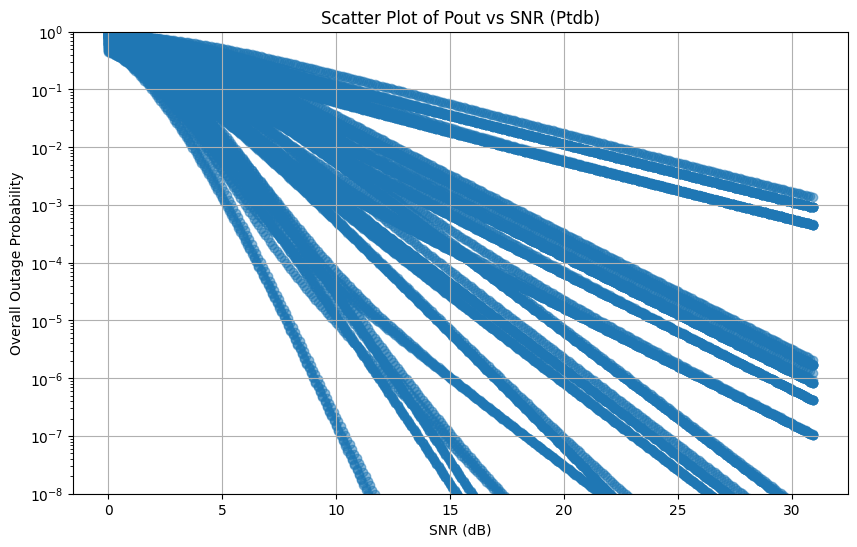

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Ptdb'], data['Pout'], alpha=0.5)
plt.xlabel('SNR (dB)')
plt.ylabel('Overall Outage Probability')
plt.title('Scatter Plot of Pout vs SNR (Ptdb)')
plt.yscale('log')
plt.ylim(1e-8, 1) # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()


In [6]:
# removed negative cases
data = data[data['Pout']>0]

count_greater_than_1 = (data['Pout'] <=0).sum()

# Print the result
print(f"Number of values less than 0: {count_greater_than_1}")

data.shape

Number of values less than 0: 0


(24860, 6)

In [7]:
X = data[['Ptdb', 'Na', 'K', 'ma', 'mb']].values  # Feature: SNR values
y = np.log(data['Pout'].values)  # Log-scaled target: log(Pout) values
print(X, y)


[[ 0.   1.   1.   1.   1. ]
 [ 0.   1.   1.   1.   2. ]
 [ 0.   1.   1.   1.   3. ]
 ...
 [30.9  3.   3.   1.   3. ]
 [30.9  3.   3.   2.   1. ]
 [30.9  3.   3.   3.   1. ]] [ -0.07442527  -0.0589274   -0.04801793 ... -24.86093393 -20.99243737
 -20.99247153]


[[ 0.   1.   1.   1.   1. ]
 [ 0.   1.   1.   1.   2. ]
 [ 0.   1.   1.   1.   3. ]
 ...
 [30.9  3.   3.   1.   3. ]
 [30.9  3.   3.   2.   1. ]
 [30.9  3.   3.   3.   1. ]] [ -0.07442527  -0.0589274   -0.04801793 ... -24.86093393 -20.99243737
 -20.99247153]
Training Mean Squared Error: 13.892145499906873
Training R^2 Score: 0.7540456201812885
Test Mean Squared Error: 13.21319913267149
Test R^2 Score: 0.7639818485945803


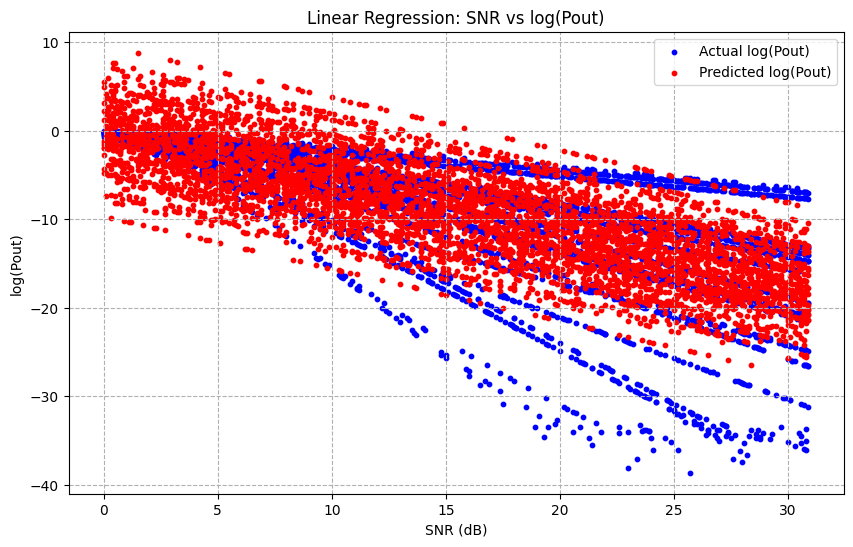

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset from the CSV file

# Define the features (X) and the log-scaled target (y)
# Ptdb  Na  K  ma  mb      Pout
X = data[['Ptdb', 'Na', 'K', 'ma', 'mb']].values  # Feature: SNR values
y = np.log(data['Pout'].values)  # Log-scaled target: log(Pout) values
print(X, y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = lin_model.predict(X_train)
y_test_pred = lin_model.predict(X_test)

# Evaluate the model's performance on the training and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)



# Print the performance metrics
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R^2 Score: {r2_train}")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R^2 Score: {r2_test}")

# Plotting the results (SNR vs actual and predicted log(Pout))
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:,0], y_test, color='blue', s=10, label='Actual log(Pout)')
plt.scatter(X_test[:,0], y_test_pred, color='red', s=10, label='Predicted log(Pout)')

plt.xlabel('SNR (dB)')
plt.ylabel('log(Pout)')
plt.title('Linear Regression: SNR vs log(Pout)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()


# above linear regression output has fatal flaw whihc is it is predicting Pout greater than 0(logged output) also The dataset does not contain any value greater than 0

In [9]:
y = np.log(data['Pout'].values)


print(np.sum(y>0), np.sum(y_train_pred>0), np.sum(y_train_pred<0))
y,  np.exp(y), data['Pout'].values

0 1806 18082


(array([ -0.07442527,  -0.0589274 ,  -0.04801793, ..., -24.86093393,
        -20.99243737, -20.99247153]),
 array([9.28276840e-01, 9.42775208e-01, 9.53116700e-01, ...,
        1.59600254e-11, 7.64012187e-10, 7.63986096e-10]),
 array([9.28276840e-01, 9.42775208e-01, 9.53116700e-01, ...,
        1.59600254e-11, 7.64012187e-10, 7.63986096e-10]))




Epoch 1/20


498/498 [==============================] - 2s 1ms/step - loss: 15.5524 - mae: 2.3705 - val_loss: 1.3292 - val_mae: 0.7656
Epoch 2/20
498/498 [==============================] - 1s 1ms/step - loss: 1.6777 - mae: 0.8023 - val_loss: 1.0182 - val_mae: 0.6327
Epoch 3/20
498/498 [==============================] - 1s 1ms/step - loss: 1.0583 - mae: 0.6351 - val_loss: 0.5501 - val_mae: 0.4476
Epoch 4/20
498/498 [==============================] - 1s 1ms/step - loss: 0.6122 - mae: 0.4838 - val_loss: 0.7129 - val_mae: 0.4816
Epoch 5/20
498/498 [==============================] - 1s 1ms/step - loss: 0.6934 - mae: 0.4932 - val_loss: 0.4126 - val_mae: 0.3758
Epoch 6/20
498/498 [==============================] - 1s 1ms/step - loss: 0.5266 - mae: 0.4338 - val_loss: 0.2733 - val_mae: 0.2865
Epoch 7/20
498/498 [==============================] - 1s 1ms/step - loss: 0.5041 - mae: 0.4230 - val_loss: 0.3355 - val_mae: 0.3164
Epoch 8/20
498/498 [==============================] - 1s 1ms/step - lo

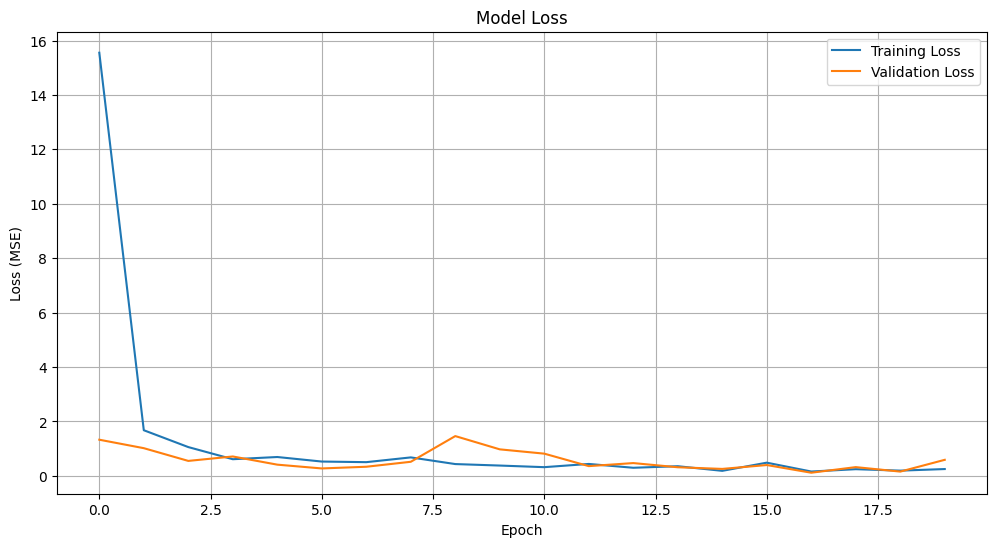

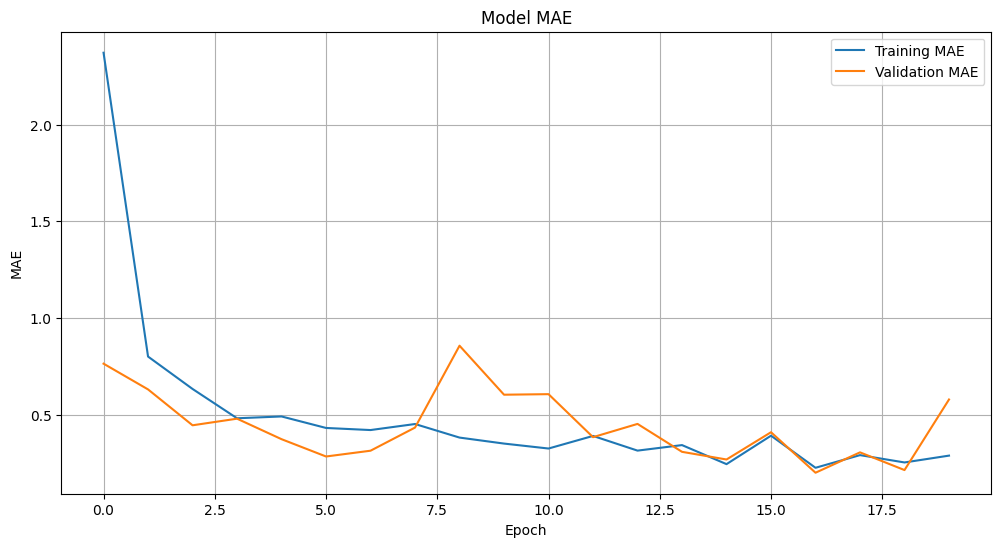

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df= data

# Define the features (X) and the log-scaled target (y)
X = df[['Ptdb', 'Na', 'K', 'ma', 'mb']].values  # Feature: SNR values
y = np.log(df['Pout'].values)  # Log-scaled target: log(Pout) values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with no activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model with validation
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the test set
y_test_pred = model.predict(X_test).flatten()
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the test performance metrics
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R^2 Score: {r2_test}")

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Optionally, you can also plot MAE (Mean Absolute Error) if interested
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [11]:
# Evaluate the model on the training set
y_train_pred = model.predict(X_train).flatten()
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R2 Score: {r2_train}")

# Print the test performance metrics
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R^2 Score: {r2_test}")

622/622 [==============================] - 0s 692us/step
Training Mean Squared Error: 0.5797111445294761
Training R2 Score: 0.9897364669101905
Test Mean Squared Error: 0.5781198845633079
Test R^2 Score: 0.9896734481123528


In [12]:
num_samples = 7
indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
X_sample = X_test[indices]
y_sample_actual = y_test[indices]

# Predict the values using the trained model
y_sample_pred = model.predict(X_sample).flatten()

# Convert the log-scaled predictions and actual values back to the original scale
y_sample_actual_original = np.exp(y_sample_actual)
y_sample_pred_original = np.exp(y_sample_pred)

# Output the inputs (SNR values) and the corresponding predicted and actual outputs
print(f"Input SNR values (dB): {X_sample.flatten().tolist()}")
print(f"Predicted Pout values: {y_sample_pred_original.tolist()}")
print(f"Actual Pout values: {y_sample_actual_original.tolist()}")

1/1 [==============================] - 0s 19ms/step
Input SNR values (dB): [18.1, 3.0, 2.0, 3.0, 2.0, 5.4, 2.0, 1.0, 1.0, 1.0, 4.0, 1.0, 3.0, 2.0, 1.0, 25.3, 2.0, 1.0, 3.0, 2.0, 1.5, 3.0, 2.0, 1.0, 3.0, 21.5, 2.0, 2.0, 2.0, 1.0, 2.3000000000000003, 3.0, 3.0, 2.0, 3.0]
Predicted Pout values: [8.773158697295003e-07, 0.4081874489784241, 0.26954036951065063, 4.168555824435316e-05, 0.3824310004711151, 0.0001183045023935847, 0.10792360454797745]
Actual Pout values: [3.565705357644576e-07, 0.3303454630696937, 0.22095931580866077, 2.19926221858291e-05, 0.34022249229162904, 6.326362815522909e-05, 0.07012837662665537]


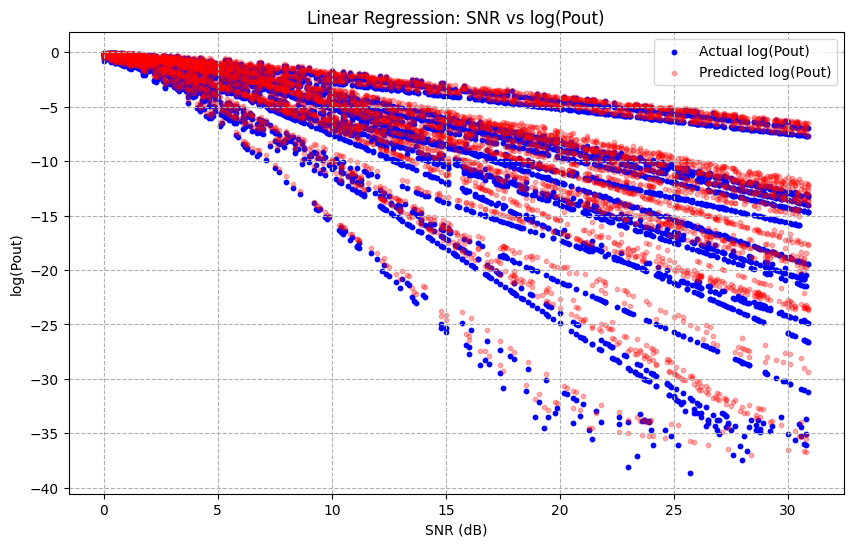

In [13]:
# Plotting the results (SNR vs actual and predicted log(Pout))
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:,0], y_test, color='blue', s=10, label='Actual log(Pout)')
plt.scatter(X_test[:,0], y_test_pred, color='red', alpha=0.3, s=10, label='Predicted log(Pout)')

plt.xlabel('SNR (dB)')
plt.ylabel('log(Pout)')
plt.title('Linear Regression: SNR vs log(Pout)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

## checking on the values needed to plot that matlab plot

In [14]:
data.head(), data.tail()

(   Ptdb  Na  K  ma  mb      Pout
 0   0.0   1  1   1   1  0.928277
 1   0.0   1  1   1   2  0.942775
 2   0.0   1  1   1   3  0.953117
 3   0.0   1  1   2   1  0.926571
 4   0.0   1  1   2   2  0.945432,
        Ptdb  Na  K  ma  mb          Pout
 25101  30.9   3  3   1   1  7.800797e-10
 25102  30.9   3  3   1   2  1.595901e-11
 25103  30.9   3  3   1   3  1.596003e-11
 25104  30.9   3  3   2   1  7.640122e-10
 25107  30.9   3  3   3   1  7.639861e-10)

In [15]:
ptdb_values = np.arange(0, 31, 5)

# Define the constant values for Na, K, ma, mb
Na = 1
K = 1
ma = 1
mb = 1

# Generate the array to feed the model
input_array = np.array([[ptdb, Na, K, ma, mb] for ptdb in ptdb_values])

In [16]:
predict_matlab = model.predict(input_array)

np.exp(predict_matlab).flatten()

1/1 [==============================] - 0s 55ms/step


array([0.99669135, 0.57636243, 0.20159811, 0.05779051, 0.01825945,
       0.00629922, 0.00200908], dtype=float32)

In [17]:
ptdb_values = np.arange(0, 31, 5)

# Define the constant values for Na, K, ma, mb
ma = 1
Na = 3
mb = 1
K = 3

actual = []
for ptdb in ptdb_values:
    actual.append(calculate_outage_probability(ptdb, ma, Na, mb, K))
# Generate the array to feed the model
input_array = np.array([[ptdb, Na, K, ma, mb] for ptdb in ptdb_values])

actual

[0.4963904934784142,
 0.03649036669799891,
 0.0013523932002731552,
 4.487692336128786e-05,
 1.4423434566701587e-06,
 4.585107349283115e-08,
 1.4523652280828971e-09]

In [18]:
predict_matlab = model.predict(input_array)

np.exp(predict_matlab).flatten(), ma, Na, mb, K

1/1 [==============================] - 0s 17ms/step


(array([5.4292303e-01, 4.5442589e-02, 1.6689863e-03, 9.5213487e-05,
        3.3316069e-06, 1.1681636e-07, 8.6210301e-09], dtype=float32),
 1,
 3,
 1,
 3)

In [19]:
import time

num_samples = 7
indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
X_sample = X_test[indices]
y_sample_actual = y_test[indices]

# Predict the values using the trained model
X_subset = X_sample[:10000]

# Start time measurement
start_time = time.time()

# Perform prediction
y_sample_pred = model.predict(X_subset).flatten()

# End time measurement
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Print the time taken
print(f"Time taken for prediction on 1000 samples: {time_taken:.4f} seconds")

# Convert the log-scaled predictions and actual values back to the original scale
y_sample_actual_original = np.exp(y_sample_actual)
y_sample_pred_original = np.exp(y_sample_pred)

# Output the inputs (SNR values) and the corresponding predicted and actual outputs
print(f"Input SNR values (dB): {X_sample.flatten().tolist()}")
print(f"Predicted Pout values: {y_sample_pred_original.tolist()}")
print(f"Actual Pout values: {y_sample_actual_original.tolist()}")

1/1 [==============================] - 0s 15ms/step
Time taken for prediction on 1000 samples: 0.0451 seconds
Input SNR values (dB): [8.5, 1.0, 1.0, 1.0, 1.0, 13.9, 3.0, 1.0, 1.0, 3.0, 22.900000000000002, 1.0, 3.0, 2.0, 3.0, 29.900000000000002, 3.0, 3.0, 2.0, 1.0, 26.700000000000003, 2.0, 3.0, 2.0, 3.0, 11.600000000000001, 2.0, 2.0, 3.0, 3.0, 1.5, 3.0, 1.0, 3.0, 2.0]
Predicted Pout values: [0.2883652150630951, 0.0006848167395219207, 3.3830994652817026e-05, 6.976610844589004e-09, 4.907556132305313e-12, 6.359238795994315e-06, 0.666959822177887]
Actual Pout values: [0.25440337741635666, 0.00040698675896899683, 1.6730043858814313e-05, 1.524079640041489e-09, 1.403134924185229e-12, 3.647520543742224e-06, 0.5596930585071185]
